In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/charlottesville-va/boo?lat=38.0574&lon=-78.4813&purveyor=owner&search_distance=63#search=1~gallery~0~26'
raw = requests.get(url,headers=header)


In [140]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="cl-static-search-result")

FOr the lab, I will gather boat data from craigslist in the charlottesville area. I will record similar variables for cars such as age, brand, year made, title, and url, but clean so that only titles with dates are represented in my dataset (less comon than in car titles). I also will look at what breands are present in order to minimize the amount of missing brands that i have later int he analysis. In the end, I will compare the price, age and brand variables just like in the example!

In [141]:
import re
brands = ['lowe', 'polar', 'sea', 'trailer', 'bass','ranger', 'sailboat',
          'yamaha','alumacraft', 'bayliner','tracker', 'monterey', 'crestliner',
          'larson','gheenoe', 'chaparral', 'taylor', 'bay', 'hawk', 'hunter', 'ski',
          'carver', 'rinker']

data = []
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']

    words = title.split()
    hits = [word for word in words if word in brands]
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]

    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title )
    if regex_search is None:
        year = np.nan
    else:
        year = regex_search.group(0)

    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})

In [142]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
df = df.dropna(subset=['age'])
print(df.shape)
df.to_csv('craigslist_cville_boats.csv')
df.head(40)

(34, 6)


,title,price,year,link,brand,age
0,2021 polar kraft 17’ roundabout,24700,2021.0,https://richmond.craigslist.org/boa/d/amelia-c...,polar,4.0
10,2001 sea ray signature 190,15000,2001.0,https://fredericksburg.craigslist.org/boa/d/fr...,sea,24.0
16,2022 gheenoe lt25,15500,2022.0,https://fredericksburg.craigslist.org/boa/d/st...,gheenoe,3.0
21,2016 xpress 1440/ 2021 trailer/ 25hp outboard,3799,2016.0,https://fredericksburg.craigslist.org/boa/d/ru...,missing,9.0
26,2024 bass hunter 2 man pontoon boat,4300,2024.0,https://harrisonburg.craigslist.org/boa/d/quin...,bass,1.0
29,1998 lowe pontoon & trailer,7000,1998.0,https://fredericksburg.craigslist.org/boa/d/mi...,lowe,27.0
30,1998 lowe pontoon & trailer,7000,1998.0,https://richmond.craigslist.org/boa/d/bumpass-...,lowe,27.0
37,2020 sun tracker,39000,2020.0,https://fredericksburg.craigslist.org/boa/d/un...,tracker,5.0
40,1998 bayliner 2252,6500,1998.0,https://fredericksburg.craigslist.org/boa/d/cu...,bayliner,27.0
45,2020 liquidlogic remix xp 9,800,2020.0,https://richmond.craigslist.org/boa/d/glen-all...,missing,5.0


count       34.000000
mean     16544.058824
std      14614.353210
min         10.000000
25%       7000.000000
50%      10500.000000
75%      24925.000000
max      68000.000000
Name: price, dtype: float64


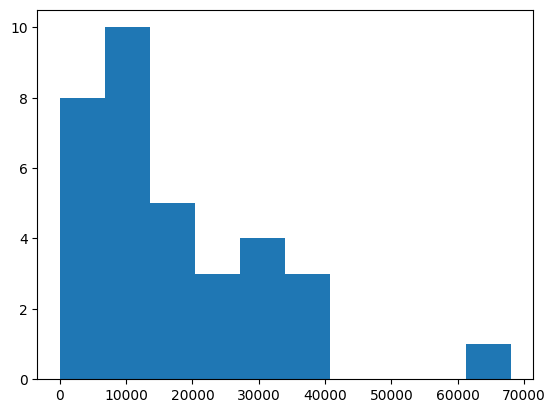

count    34.000000
mean     17.382353
std      13.312138
min       1.000000
25%       5.250000
50%      17.000000
75%      25.750000
max      49.000000
Name: age, dtype: float64


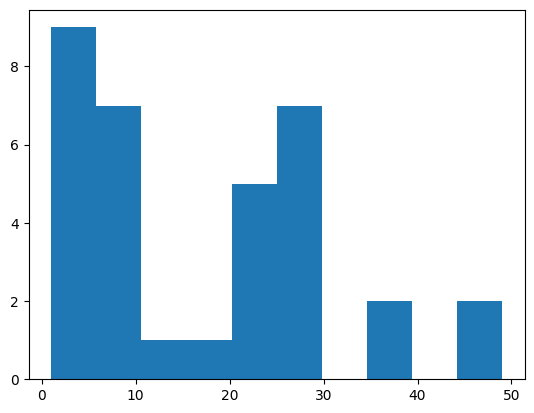

In [143]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [144]:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                          \
           count          mean           std      min       25%      50%   
brand                                                                      
alumacraft   1.0  35000.000000           NaN  35000.0  35000.00  35000.0   
bass         2.0   2550.000000   2474.873734    800.0   1675.00   2550.0   
bay          1.0  25000.000000           NaN  25000.0  25000.00  25000.0   
bayliner     2.0   8000.000000   2121.320344   6500.0   7250.00   8000.0   
carver       1.0  68000.000000           NaN  68000.0  68000.00  68000.0   
chaparral    1.0  11500.000000           NaN  11500.0  11500.00  11500.0   
crestliner   1.0  14000.000000           NaN  14000.0  14000.00  14000.0   
gheenoe      1.0  15500.000000           NaN  15500.0  15500.00  15500.0   
hawk         1.0  33000.000000           NaN  33000.0  33000.00  33000.0   
hunter       1.0  21500.000000           NaN  21500.0  21500.00  21500.0   
larson       1.0  28995.000000           NaN  28995.0  28995.00  28995.0   
lowe         2.0   7000.000000      0.000000   7000.0   7000.00   7000.0   
missing      3.0   4699.666667   4419.377822    800.0   2299.50   3799.0   
monterey     1.0   8000.000000           NaN   8000.0   8000.00   8000.0   
polar        1.0  24700.000000           NaN  24700.0  24700.00  24700.0   
ranger       3.0  21500.000000  10392.304845   9500.0  18500.00  27500.0   
rinker       1.0  19999.000000           NaN  19999.0  19999.00  19999.0   
sailboat     1.0   2200.000000           NaN   2200.0   2200.00   2200.0   
sea          2.0  11247.500000   5306.836393   7495.0   9371.25  11247.5   
ski          1.0   3500.000000           NaN   3500.0   3500.00   3500.0   
taylor       1.0     10.000000           NaN     10.0     10.00     10.0   
tracker      2.0  39000.000000      0.000000  39000.0  39000.00  39000.0   
trailer      1.0   8200.000000           NaN   8200.0   8200.00   8200.0   
yamaha       2.0  14600.000000   7353.910524   9400.0  12000.00  14600.0   

                               
                 75%      max  
brand                          
alumacraft  35000.00  35000.0  
bass         3425.00   4300.0  
bay         25000.00  25000.0  
bayliner     8750.00   9500.0  
carver      68000.00  68000.0  
chaparral   11500.00  11500.0  
crestliner  14000.00  14000.0  
gheenoe     15500.00  15500.0  
hawk        33000.00  33000.0  
hunter      21500.00  21500.0  
larson      28995.00  28995.0  
lowe         7000.00   7000.0  
missing      6649.50   9500.0  
monterey     8000.00   8000.0  
polar       24700.00  24700.0  
ranger      27500.00  27500.0  
rinker      19999.00  19999.0  
sailboat     2200.00   2200.0  
sea         13123.75  15000.0  
ski          3500.00   3500.0  
taylor         10.00     10.0  
tracker     39000.00  39000.0  
trailer      8200.00   8200.0  
yamaha      17200.00  19800.0

In [145]:
df.loc[:,['age','brand']].groupby('brand').describe()

age                                                      
           count       mean        std   min    25%   50%    75%   max
brand                                                                 
alumacraft   1.0   7.000000        NaN   7.0   7.00   7.0   7.00   7.0
bass         2.0   3.500000   3.535534   1.0   2.25   3.5   4.75   6.0
bay          1.0   3.000000        NaN   3.0   3.00   3.0   3.00   3.0
bayliner     2.0  26.000000   1.414214  25.0  25.50  26.0  26.50  27.0
carver       1.0  26.000000        NaN  26.0  26.00  26.0  26.00  26.0
chaparral    1.0  25.000000        NaN  25.0  25.00  25.0  25.00  25.0
crestliner   1.0  14.000000        NaN  14.0  14.00  14.0  14.00  14.0
gheenoe      1.0   3.000000        NaN   3.0   3.00   3.0   3.00   3.0
hawk         1.0   5.000000        NaN   5.0   5.00   5.0   5.00   5.0
hunter       1.0  39.000000        NaN  39.0  39.00  39.0  39.00  39.0
larson       1.0  20.000000        NaN  20.0  20.00  20.0  20.00  20.0
lowe         2.0  27.000000   0.000000  27.0  27.00  27.0  27.00  27.0
missing      3.0  11.666667   8.326664   5.0   7.00   9.0  15.00  21.0
monterey     1.0  21.000000        NaN  21.0  21.00  21.0  21.00  21.0
polar        1.0   4.000000        NaN   4.0   4.00   4.0   4.00   4.0
ranger       3.0  13.000000   8.660254   8.0   8.00   8.0  15.50  23.0
rinker       1.0  22.000000        NaN  22.0  22.00  22.0  22.00  22.0
sailboat     1.0  49.000000        NaN  49.0  49.00  49.0  49.00  49.0
sea          2.0  16.000000  11.313708   8.0  12.00  16.0  20.00  24.0
ski          1.0  37.000000        NaN  37.0  37.00  37.0  37.00  37.0
taylor       1.0  49.000000        NaN  49.0  49.00  49.0  49.00  49.0
tracker      2.0   5.000000   0.000000   5.0   5.00   5.0   5.00   5.0
trailer      1.0  26.000000        NaN  26.0  26.00  26.0  26.00  26.0
yamaha       2.0   6.000000   2.828427   4.0   5.00   6.0   7.00   8.0

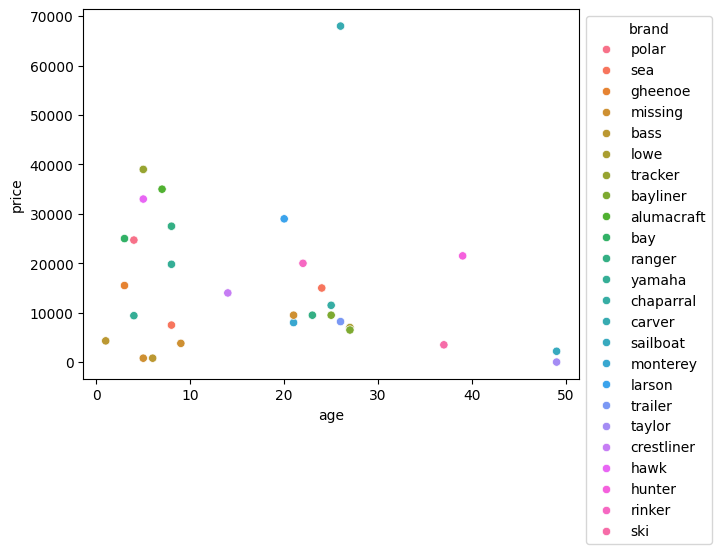

In [146]:
ax = sns.scatterplot(data=df, x='age', y='price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

           log_price   log_age
log_price   2.518814 -0.366216
log_age    -0.366216  0.910673
           log_price   log_age
log_price   1.000000 -0.241801
log_age    -0.241801  1.000000


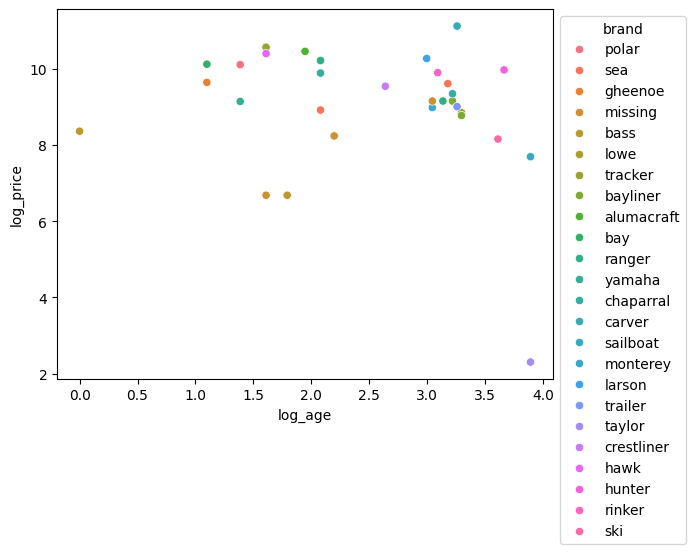

In [147]:
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data=df, x='log_age', y='log_price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(df.loc[:,['log_price','log_age']].cov())
print(df.loc[:,['log_price','log_age']].corr())

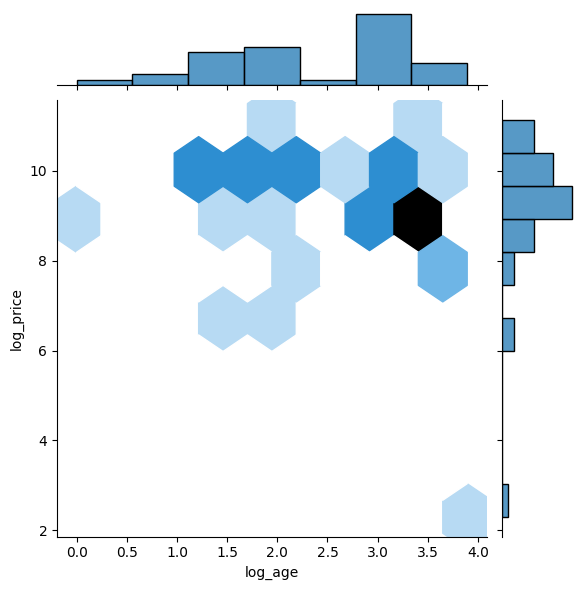

In [138]:
sns.jointplot(data=df, x='log_age', y='log_price',kind='hex')

Interesingly enough, there does not seem to be too much of a decrease in price as the age of the boats increase, as I expected. Normally as with cars, the older a car is the less it is worth. However, as can be seen in both scatterplots, a clear negative relationship between age and price can not be discerned

In this lab, I completed a similar process as siggested for cars but for boats! I enjoyred doing this lab, and added a coupel of features. For many boats, there was no age listed so I only included rows which listed an age. This helped my data analysis later since the variables age, price, and brand were compared. Another difference I discover when looking into the boat data was that there was not the same consistency in brands, and I was not familiar with some of the names, so i feel that aspect of the analyses was a bit clouded. Overall it feels rewarding to be able to get data right off the internet and do analysis on it myself!!